# Практическая работа № 10-11
# Оценка погрешности вычисления координат объекта по азимуту от визиров с двух навигационных маяков


На ближайших двух занятиях будем заниматься моделированием погрешностей в задаче локальной навигации.

Контекст следующий:

объект перемещается в зоне прямой видимости двух специальных устройств - оптических навигационных маяков; координаты маяков известны; известны азимуты визирования с маяков на объект.

Задача:

- вычислить координаты объекта;
- оценить влияние шума в исходных данных на погрешность оценки координат объекта.


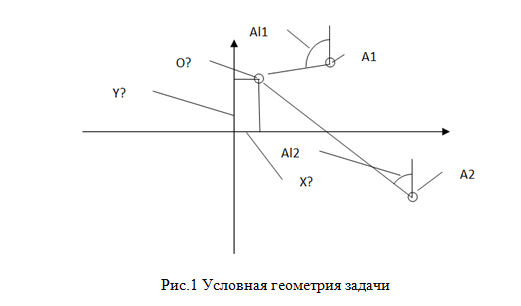

Пусть X,Y -координаты объекта

[X1,Y1] – координаты первого маяка

[X2,Y2] – координаты второго маяка

Al1- азимут визирования с первого маяка на определяемый объект

Al2- азимут визирования с второго маяка на определяемый объект






## Практическая работа №10

### 1. Вычисление координат по азимутам визирования

Координаты объекта находятся из простой системы уравнений:

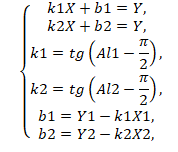

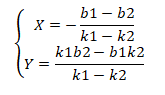

---------------
**Самостоятельно**: попробуйте вывести эти формулы, исходя из геометрии задачи


Вычислим координаты для тестового набора данных

- X1,Y1 = 3,4 #Координаты первого анкера
- X2,Y2 = 5,-2 #Координаты второго анкера
- Al_1 = 130 #азимут визирования с первого анкера на определяемый объект, градусы
- Al_2 = 50 #азимут визирования с второго анкера на определяемый объект, градусы

Визуализируем решение

---------
**Самостоятельно:** экспериментируя с исходными данными, понаблюдайте, как меняется рисунок. Подумайте, что будет, если объект окажется ровно между маяками

### 2. Модель шума

Теперь рассмотрим, как сказывается наличие ошибки в азимутах визирования на погрешности расчета координат объекта в зависимости от его положения на плоскости. Для этого добавим в исходные данные случайную составляющую, имеющую нормальное распределение с нулевым математическим ожиданием и среднеквадратическим отклонением σ_n. 

Смоделируем его отдельно

----------
**Самостоятельно** Поэкспериментируйте с параметрами шума, выясните их влияние.

В случае наличия шума в исходных данных речь уже идет не о значениях параметров, а об *оценках* этих значений, которые в случае аддитивного шума примут вид:

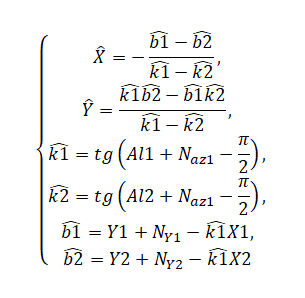


В качестве меры ошибки оценки координат будем использовать СКО в каждой точке для статистически значимого числа итераций K:

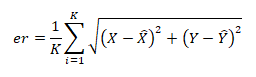

### 3. Подготовим данные

Как вы понимаете, для получения сколько-нибудь значимых результатов, в каждой точке нам необходимо сделать значительное число опытов. Прежде чем приступать к моделированию, давайте перепишем вычисление координат как отдельную функцию. Кроме того, т.к. нам предется рассчитывать координаты для сетки углов, хорошо бы, чтобы она могла принимать на вход не по одному угловому значению, а сразу все, и возвращала бы массивы координат. 

----------
**Самостоятельно** Разберитесь, что делает функция meshgrid; выясните, какую размерность имеют наборы координат на выходе функции

Проверим ее

Зададимся расположением маяков на оси Ox симметрично относительно нуля. Т.е. мы ожидаем наблюдать симметричную картину как относительно оси Ox, так и относительно Oy. 

Если рассчитать координаты объекта по данной сетки углов, с учетом симметрии, мы получим примерно следующую картину:

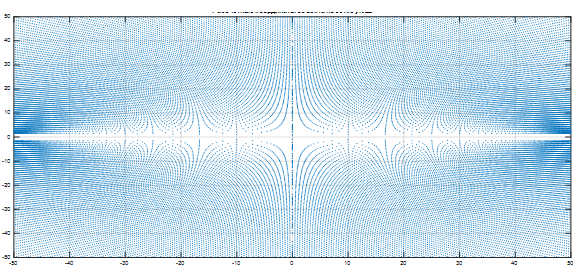

# Практическая работа № 11


На прошлом занятии мы разобрались с процедурой вычисления координат по азимутальным углам, выбрали модель шума. Теперь давайте рассчитаем координатные сетки для объекта и построим график, аналогичный показанному выше.

При равномерной сетке по углам мы, очевидно, получаем неравноменую сетку для координат объекта. Причем наиболее интересная область вблизи оси x просчитывается наименее редко. Давайте используем неравномерную сетку по углам.

### 4. Моделирование

Представляют интерес границы области, в которой погрешности сохраняют адекватные значения, поэтому давайте построим сечение поверхности ошибок

Рассмотрим случай, когда объект перемещается строго вдоль оси Oy, и рассчитаем погрешности для различных значений σ_az. 
В этом случае азимуты визирования с первого и второго маяка связаны следующим соотношением: Al1 = 360 – Al2.


Немного изменим функцию для расчета координат объекта, чтобы она возвращала одномерные векторы, а не матрицы

Мы можем наблюдать, что X нигде не равен 0 в точности, однако очень к нему близок.

**Самостоятельно** поэкспериментируйте с числом итераций K. На что влияет его величина?

## 5. Исследуем влияние СКО шума

Для удобства экспериментов было бы неплохо переопределить расчет погрешности позиционирования как отдельную функцию. При этом есть нюанс: мы можем вычислять либо всю поверхность погрешности, либо ее заданное сечение, используя либо ранее написанную функцию compute_position(), либо compute_section(). Как вы, вероятно, помните, в Python функция являетс объектом и может быть передана в другую функцию. Вот простой пример того, как работает эта магия:

Давайте создадим функцию вычисления погрешностей и будем передавать ей функцию вычисления координат как параметр.

Смоделируем погрешности при разных СКО шума

## Выводы